# Object: Face

In [ ]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array, to_categorical
folder = '/content/drive/MyDrive/AI-project/Face/train_set/'
x_train,y_train=list(),list()
for file in listdir(folder):
  output=0.0
  if file.startswith('Mphuc '): 
    output=1
  if file.startswith('Cuong '): 
    output=2
  if file.startswith('Danh '): 
    output=3  
  if file.startswith('dat '): 
    output=4
  if file.startswith('Dien '): 
    output=5
  if file.startswith('Khang '): 
    output=6
  if file.startswith('Luan '): 
    output=7
  if file.startswith('Phat '): 
    output=8
  if file.startswith('Phuc '): 
    output=9
  if file.startswith('QuocDung '): 
    output=10
  if file.startswith('Tan '): 
    output=11
  if file.startswith('Thuan '): 
    output=12
  if file.startswith('VietDung '): 
    output=13
  photo=load_img(folder+file,target_size=(30,30))
  photo=img_to_array(photo)
  x_train.append(photo)
  y_train.append(output)
x_train=asarray(x_train) 
y_train=asarray(y_train)
y_train =to_categorical(y_train) 
print(x_train.shape,y_train.shape)
save('x_train.npy',x_train)
save('y_train.npy',y_train)

folder = '/content/drive/MyDrive/AI-project/Face/test_set/'
x_test,y_test=list(),list()
for file in listdir(folder):
  output=0.0
  if file.startswith('Mphuc'): 
    output=1
  if file.startswith('Cuong '): 
    output=2
  if file.startswith('Danh '): 
    output=3  
  if file.startswith('dat '): 
    output=4
  if file.startswith('Dien '): 
    output=5
  if file.startswith('Khang '): 
    output=6
  if file.startswith('Luan '): 
    output=7
  if file.startswith('Phat '): 
    output=8
  if file.startswith('Phuc '): 
    output=9
  if file.startswith('QuocDung '): 
    output=10
  if file.startswith('Tan '): 
    output=11
  if file.startswith('Thuan '): 
    output=12
  if file.startswith('VietDung '): 
    output=13
  photo=load_img(folder+file,target_size=(30,30))
  photo=img_to_array(photo)
  x_test.append(photo)
  y_test.append(output)
x_test=asarray(x_test) 
y_test=asarray(y_test) 
y_test =to_categorical(y_test)
print(x_test.shape,y_test.shape)
save('x_test.npy',x_test)
save('y_test.npy',y_test)

x_train = x_train.reshape(650, 30, 30, 3)
x_train= x_train.astype('float32')/255
print(x_train.shape)

x_test = x_test.reshape(130, 30, 30, 3)
x_test=  x_test.astype('float32')/255
print(x_test.shape)

(650, 30, 30, 3) (650, 14)
(130, 30, 30, 3) (130, 14)
(650, 30, 30, 3)
(130, 30, 30, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,LeakyReLU
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(30,30,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(14,activation='softmax'))

from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size=64,epochs=50,verbose=1)
model.summary()

Epoch 1/50
11/11 [==============================] - 1s 7ms/step - loss: 2.5405 - accuracy: 0.1277
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 2.0847 - accuracy: 0.3677
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 1.3261 - accuracy: 0.6138
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.5238 - accuracy: 0.8477
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 0.3046 - accuracy: 0.9108
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 0.1755 - accuracy: 0.9538
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 0.1255 - accuracy: 0.9615
Epoch 8/50
11/11 [==============================] - 0s 6ms/step - loss: 0.1222 - accuracy: 0.9662
Epoch 9/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0783 - accuracy: 0.9800
Epoch 10/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0630 - accuracy: 0.9831
Epoch 11/50
11/11 [

In [ ]:
acc,loss  = model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 7.8165e-04 - accuracy: 1.0000


Input Name: dat
1/1 [==============================] - 1s 929ms/step
Predicted label: dat
1/1 [==============================] - 0s 96ms/step
Predicted label: dat
1/1 [==============================] - 0s 110ms/step
Predicted label: dat
1/1 [==============================] - 0s 130ms/step
Predicted label: dat
1/1 [==============================] - 0s 128ms/step
Predicted label: dat
1/1 [==============================] - 0s 109ms/step
Predicted label: dat
1/1 [==============================] - 0s 75ms/step
Predicted label: dat
1/1 [==============================] - 0s 86ms/step
Predicted label: dat
1/1 [==============================] - 0s 68ms/step
Predicted label: dat


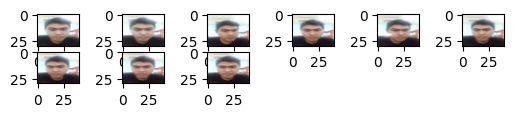

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
folder = '/content/drive/MyDrive/AI-project/Face/test_set/'

dict = {1:'Mphuc', 2:'Cuong', 3:'Danh', 4:'dat', 5:'Dien', 6:'Khang', 7:'Luan', 8:'Phat', 9:'Phuc', 10:'QuocDung', 11:'Tan', 12:'Thuan', 13:'VietDung'}

input_ = input("Input Name: ")
for i in range(0,9):
  plt.subplot(10,6,i+1)
  filename = folder + input_ + ' (' + str(i+1) + ').jpg'
  img = imread(filename)
  plt.imshow(img)
  
  img = load_img(filename, target_size=(30, 30))
  img_arr = img_to_array(img)
  img_arr = img_arr.reshape((1,) + img_arr.shape)
  img_arr = img_arr.astype('float32')/255
  prediction = model.predict(img_arr)
  label = np.argmax(prediction)
  print('Predicted label:', dict[label])
plt.show()